In [1]:
import re
import time
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('celebrity_cleaned.csv')

In [3]:
df_small = data.dropna()
df_small.shape

(309, 12)

In [4]:
df_small.describe().round(2)

,Net_Worth,Height,Salary,Age
count,3.090000e+02,309.00,3.090000e+02,309.00
mean,5.817799e+07,1.75,9.072566e+06,49.72
std,1.064088e+08,0.10,2.662176e+07,12.43
min,1.000000e+00,1.35,1.000000e+00,20.00
25%,1.000000e+07,1.68,1.000000e+05,41.00
50%,2.000000e+07,1.75,2.500000e+05,49.00
75%,4.500000e+07,1.83,5.000000e+06,57.00
max,6.000000e+08,1.96,3.000000e+08,95.00


In [5]:
df_big = data
del(df_big['Salary'])
df_big = df_big.dropna()
df_big.shape

(6552, 11)

In [6]:
df_big.describe().round(2)

,Net_Worth,Height,Age
count,6.552000e+03,6552.00,6552.00
mean,2.458901e+07,1.74,51.57
std,6.807521e+07,0.11,16.22
min,1.000000e+00,0.81,17.00
25%,3.000000e+06,1.68,39.00
50%,7.000000e+06,1.75,49.00
75%,1.800000e+07,1.82,62.00
max,2.000000e+09,2.26,109.00


In [7]:
data_big_numeric = df_big.select_dtypes(exclude=["object"])
data_big_object = df_big.select_dtypes(include=["object"])

In [8]:
data_small_numeric = df_small.select_dtypes(exclude=["object"])
data_small_object = df_small.select_dtypes(include=["object"])

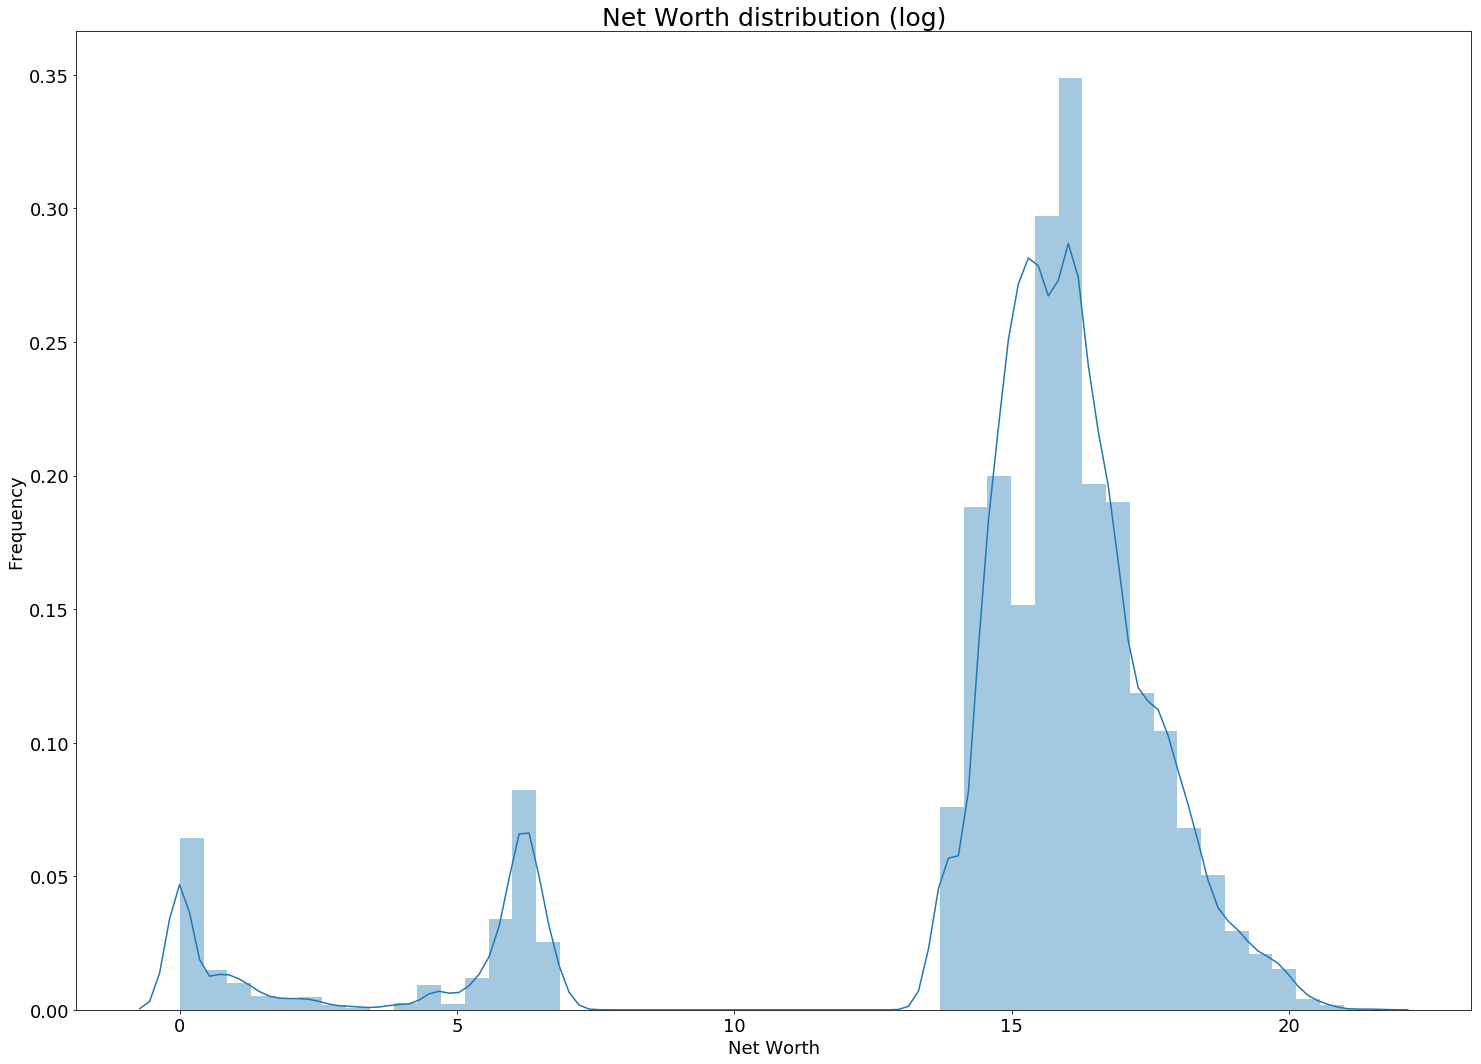

In [9]:
plt.figure(figsize=(25,18))
sns.distplot(np.log(df_big.Net_Worth.replace(0, 00000.1)))
plt.title('Net Worth distribution (log)', fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Net Worth", fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

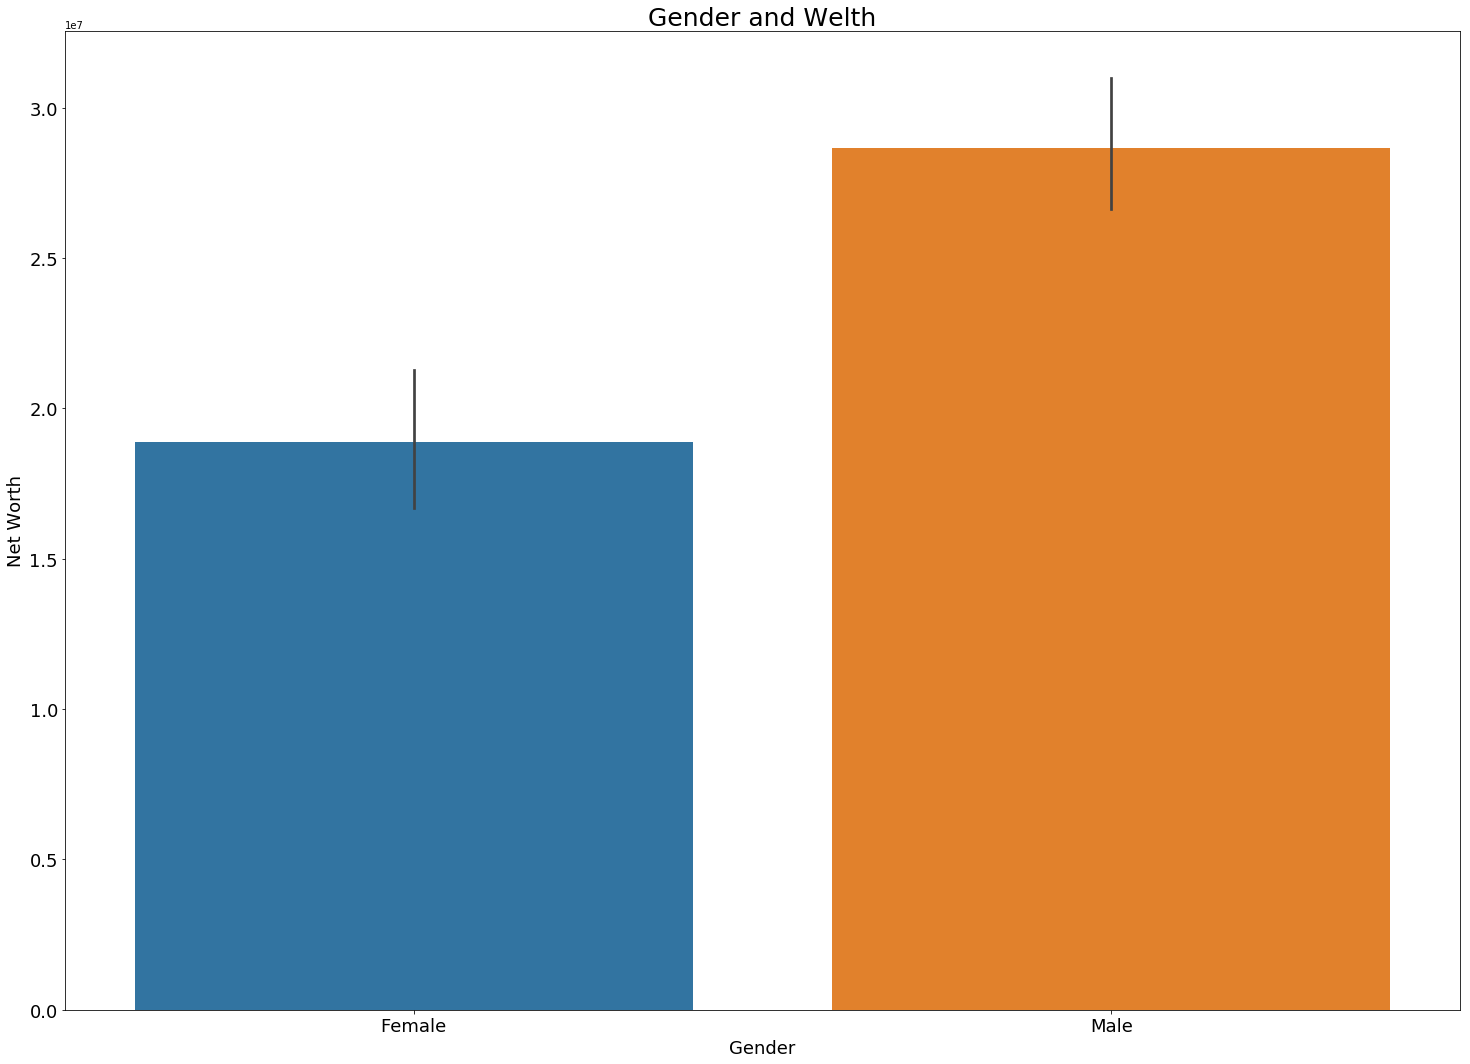

In [10]:
plt.figure(figsize=(25,18))
sns.barplot(x="Gender", y="Net_Worth", data=df_big)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Gender", fontsize=18)
plt.ylabel('Net Worth', fontsize=18)
plt.title('Gender and Welth', fontsize=25)
plt.show()

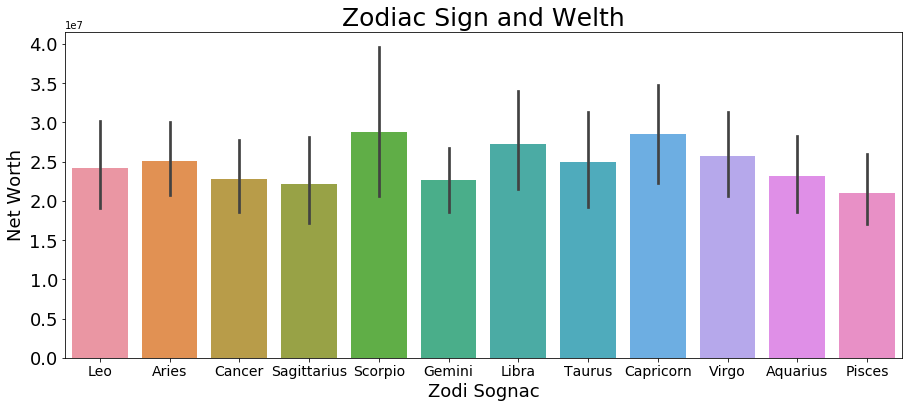

In [11]:
plt.figure(figsize=(15,6))
sns.barplot(x="Zodiac_Sign", y="Net_Worth", data=df_big)
plt.xticks(fontsize=14)
plt.yticks(fontsize=18)
plt.xlabel("Zodi Sognac", fontsize=18)
plt.ylabel('Net Worth', fontsize=18)
plt.title('Zodiac Sign and Welth', fontsize=25)
plt.show()

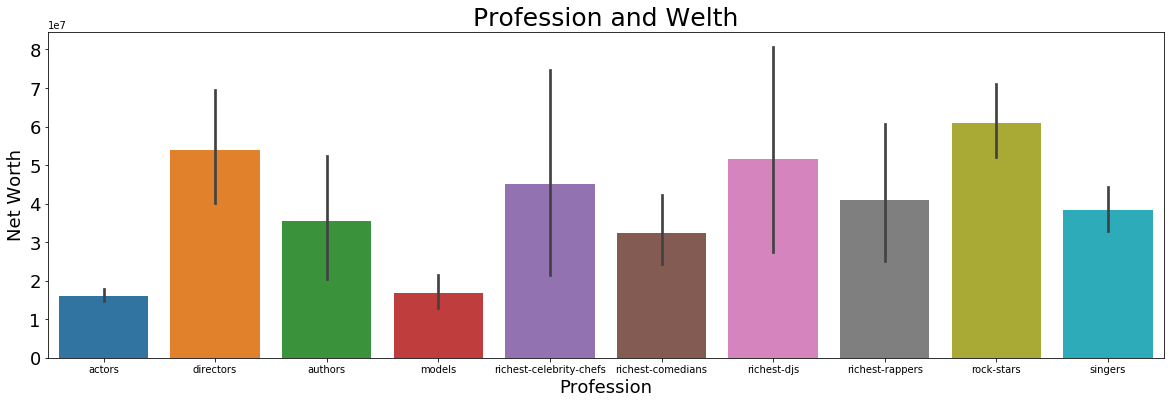

In [12]:
plt.figure(figsize=(20,6))
sns.barplot(x="Category", y="Net_Worth", data=df_big)

plt.xticks(fontsize=10)
plt.yticks(fontsize=18)
plt.xlabel("Profession", fontsize=18)
plt.ylabel('Net Worth', fontsize=18)

plt.title('Profession and Welth', fontsize=25)
plt.show()

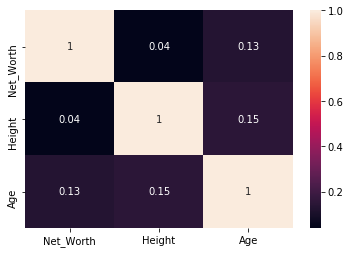

In [13]:
sns.heatmap(df_big.corr().abs().round(2), annot=True)
plt.show()

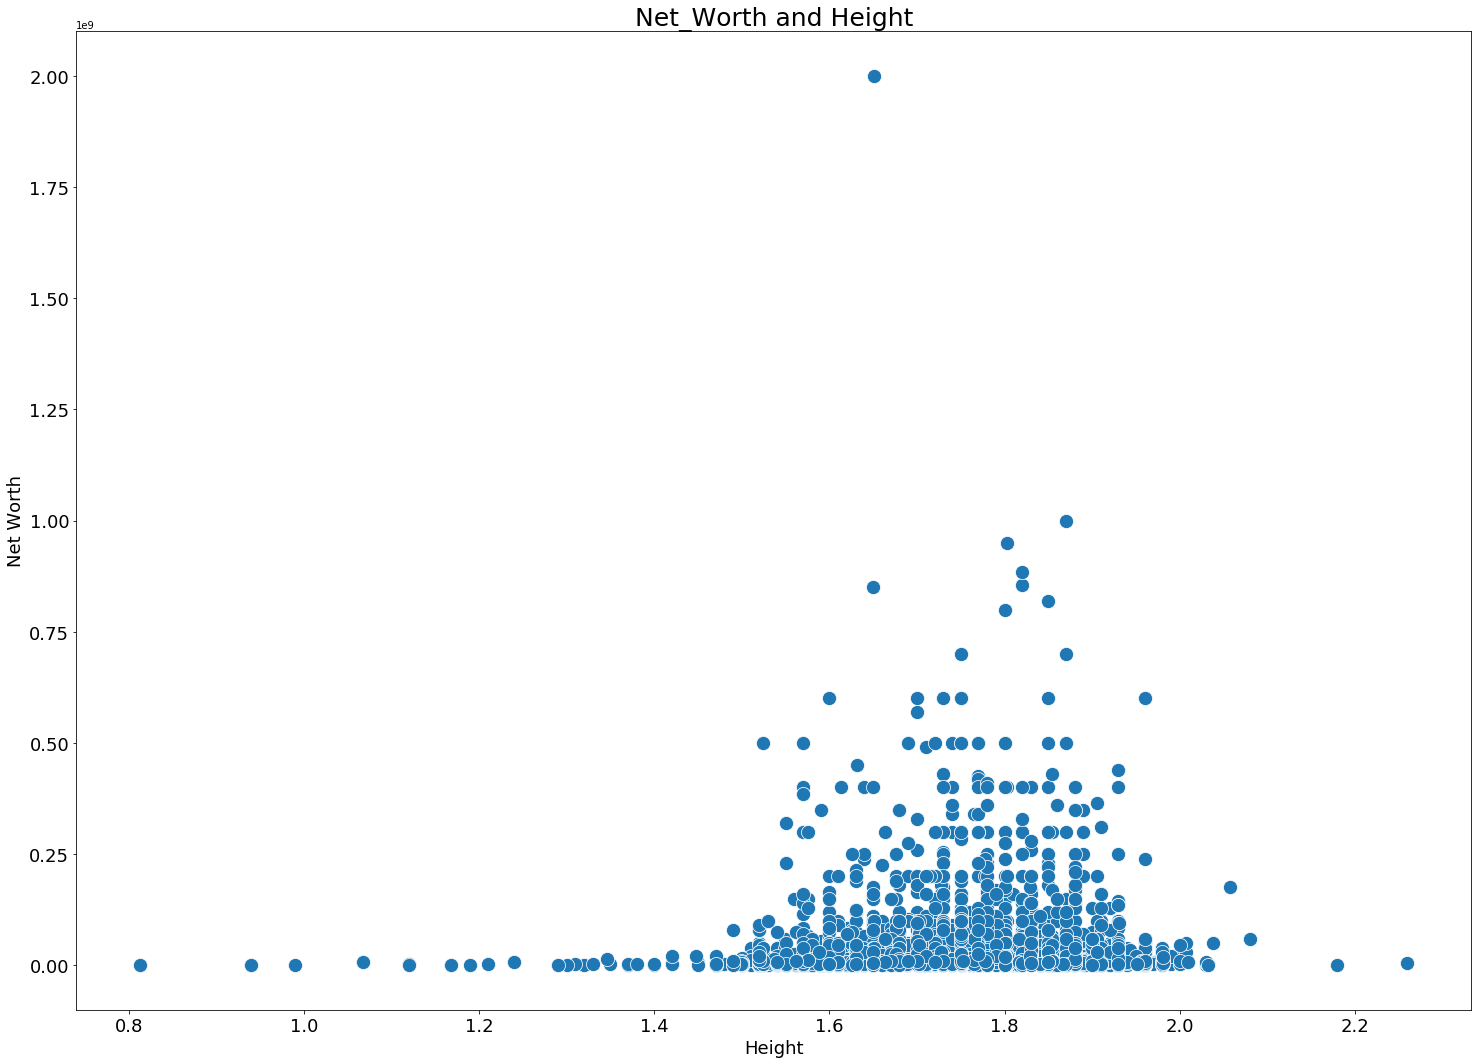

In [14]:
plt.figure(figsize=(25,18))
sns.scatterplot(x='Height', y='Net_Worth', data=df_big, s=200)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Height", fontsize=18)
plt.ylabel('Net Worth', fontsize=18)

plt.title('Net_Worth and Height', fontsize=25)
plt.show()

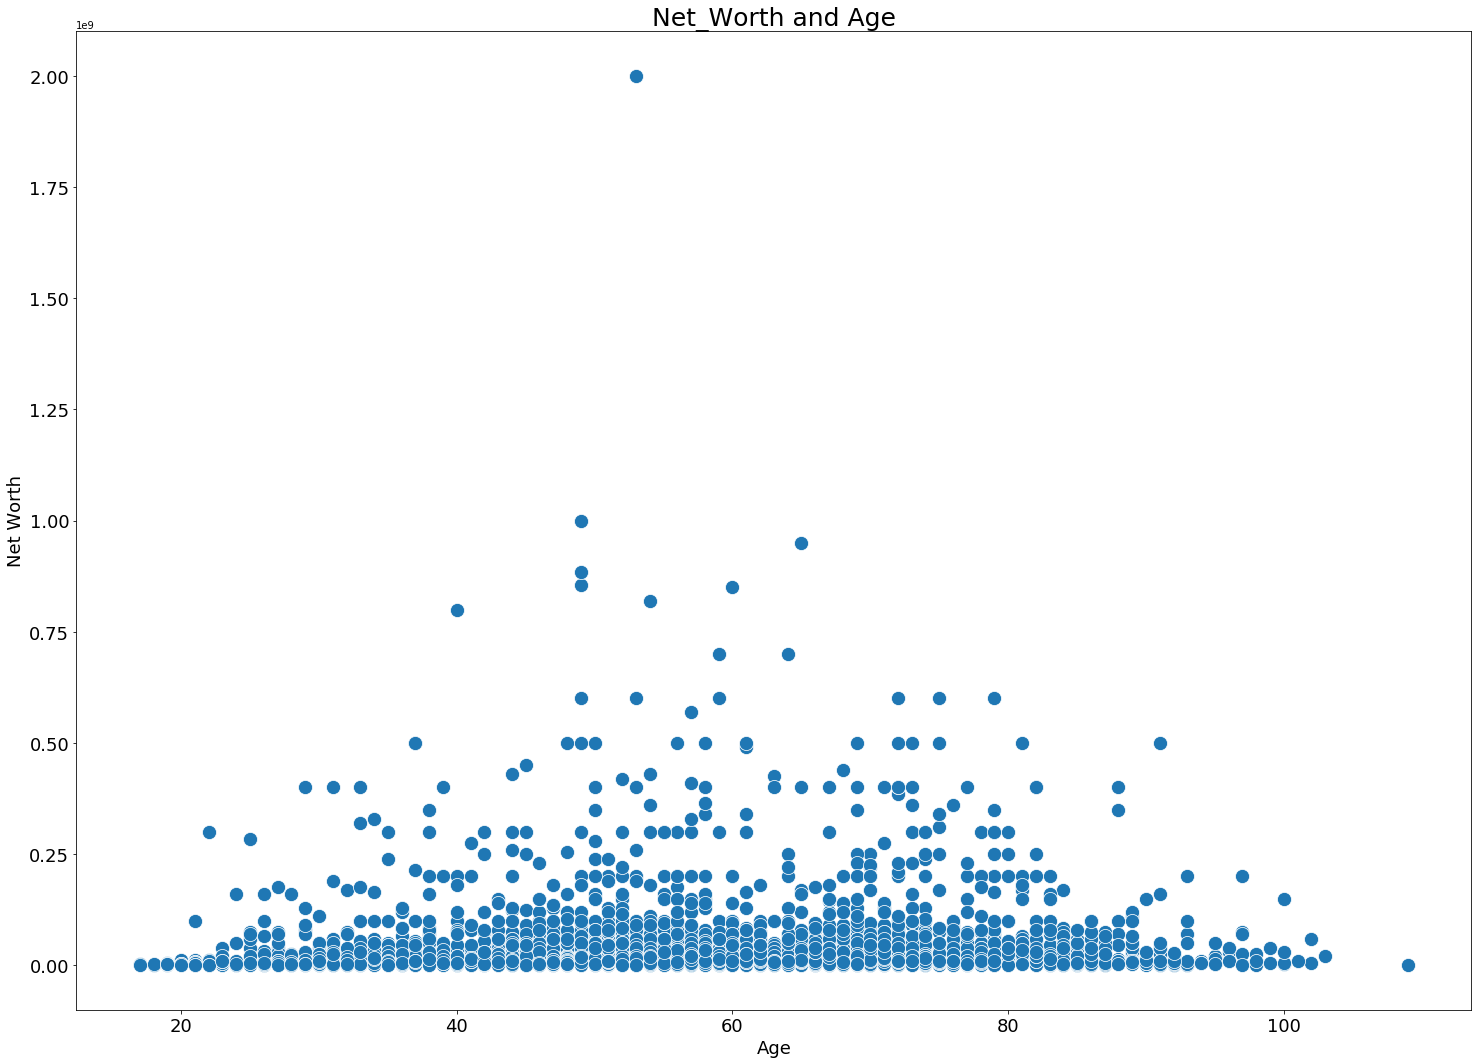

In [15]:
plt.figure(figsize=(25,18))
sns.scatterplot(x='Age', y='Net_Worth', data=df_big, s=200)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Age", fontsize=18)
plt.ylabel('Net Worth', fontsize=18)

plt.title('Net_Worth and Age', fontsize=25)
plt.show()

In [16]:
df_big.sort_values('Age', ascending=False).head(10)

,Name_Surname,Net_Worth,Date_of_Birth,Gender,Height,Profession,Nationality,Category,Age,Alive,Zodiac_Sign
1713,luise_rainer,1.0,Jan 12 1910,Female,1.6300,Actor,Germany,actors,109.0,Jan 12 1910,Capricorn
4277,olivia_de_havilland,20000000.0,Jul 1 1916,Female,1.6000,Actor,United Kingdom,actors,103.0,Jul 1 1916,Cancer
2049,kirk_douglas,60000000.0,Dec 9 1916,Male,1.7500,"Actor, Film Producer, Author, Film director, B...",United States of America,actors,102.0,Dec 9 1916,Sagittarius
2749,george_gaynes,5000000.0,May 16 1917,Male,1.8800,"Actor, Singer",United States of America,actors,102.0,May 16 1917,Taurus
4211,june_foray,10000000.0,Sep 18 1917,Female,1.4986,"Actor, Voice Actor",United States of America,actors,101.0,Sep 18 1917,Virgo
2227,gloria_stuart,5000000.0,Jul 4 1910,Female,1.6500,"Actor, Artist, Painter, Printmaker, Activist, ...",United States of America,actors,100.0,Jul 4 1910,Cancer
8568,george_burns,30000000.0,Jan 20 1896,Male,1.7000,"Comedian, Actor, Television Producer, Radio pe...",United States of America,richest-comedians,100.0,Jan 20 1896,Aquarius
1849,ellen_dow,2000000.0,Nov 16 1918,Female,1.4900,"Teacher, Actor, Choreographer",United States of America,actors,100.0,Nov 16 1918,Scorpio
8460,bob_hope,150000000.0,May 29 1903,Male,1.7900,"Comedian, Golfer, Actor, Film Producer, Author...",United States of America,richest-comedians,100.0,May 29 1903,Gemini
5062,alan_young,5000000.0,Nov 19 1919,Male,1.7800,"Actor, Voice Actor",United Kingdom,actors,99.0,Nov 19 1919,Scorpio
